<a href="https://colab.research.google.com/github/aminatulmaimuna/Visualisasi-penyakit-tidak-menular/blob/main/Visualisasi_penyakit_tidak_menular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving penyakit_tidak_menular_clean.csv to penyakit_tidak_menular_clean.csv


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('penyakit_tidak_menular_clean.csv')

In [8]:
print(df.head())

                                                  no  kode_kabupaten  \
0  1,3215,KARAWANG,3215010,PANGKALAN,PANGKALAN,HI...             NaN   
1                                                  2          3215.0   
2                                                  3          3215.0   
3                                                  4          3215.0   
4  5,3215,KARAWANG,3215010,PANGKALAN,PANGKALAN,DI...             NaN   

  nama_kabupaten  kode_kecamatan nama_kecamatan nama_puskesmas  \
0            NaN             NaN            NaN            NaN   
1       KARAWANG       3215010.0      PANGKALAN      PANGKALAN   
2       KARAWANG       3215010.0      PANGKALAN      PANGKALAN   
3       KARAWANG       3215010.0      PANGKALAN      PANGKALAN   
4            NaN             NaN            NaN            NaN   

  penyakit_tidak_menular  jumlah satuan   tahun  
0                    NaN     NaN    NaN     NaN  
1           KANKER RAHIM     2.0  KASUS  2020.0  
2        KANKER PAYU

In [9]:
df['jumlah'] = df['jumlah'].fillna(0).astype(int)

In [10]:
print(df['jumlah'].head())

0    0
1    2
2    1
3    0
4    0
Name: jumlah, dtype: int64


In [11]:
print(df['jumlah'].describe())

count    250.000000
mean      42.904000
std      144.540647
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      999.000000
Name: jumlah, dtype: float64


In [12]:
df.to_csv('penyakit_tidak_menular_cleaned.csv', index=False)

In [13]:
data = {
    'Provinsi': ['Jawa Timur', 'DKI Jakarta', 'Jawa Tengah', 'Jawa Barat', 'Sumatera Utara'],
    'Jumlah Kasus': [480, 600, 350, 410, 290],
    'Penyakit': ['ISPA', 'Diare', 'DBD', 'ISPA', 'Diare']
}

df = pd.DataFrame(data)

In [14]:
top_provinsi = df.loc[df['Jumlah Kasus'].idxmax()]

# Penyakit dengan jumlah kasus terbanyak
penyakit_summary = df.groupby('Penyakit')['Jumlah Kasus'].sum()
top_penyakit = penyakit_summary.idxmax()
top_penyakit_cases = penyakit_summary.max()

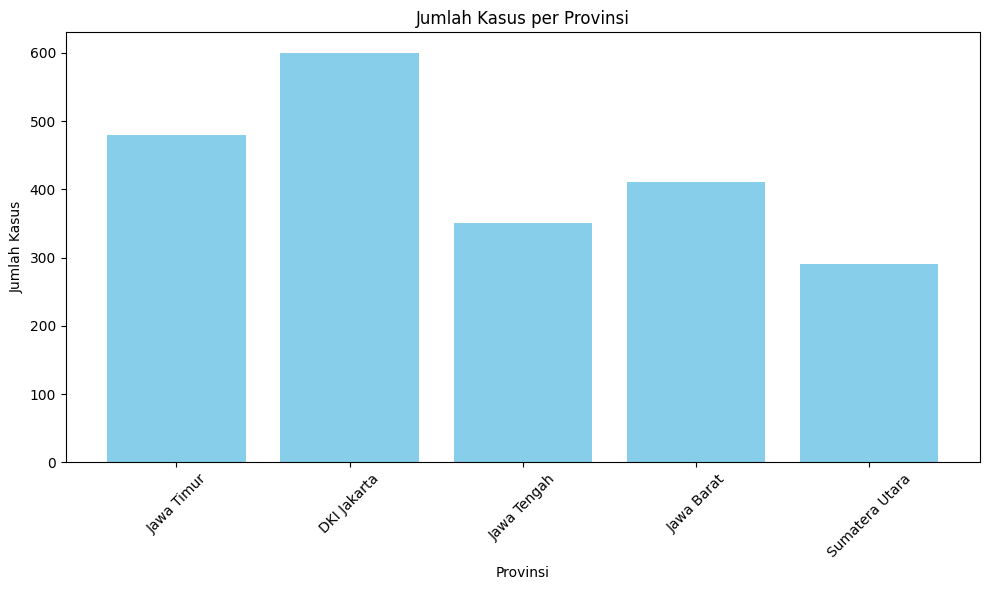

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df['Provinsi'], df['Jumlah Kasus'], color='skyblue')
plt.title('Jumlah Kasus per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Kasus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
if 'Tahun' in df.columns:
    trend = df.groupby('Tahun')['Jumlah Kasus'].sum()

    plt.figure(figsize=(10, 5))
    plt.plot(trend.index, trend.values, marker='o', linestyle='-', color='green')
    plt.title('Tren Jumlah Kasus per Tahun')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Kasus')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


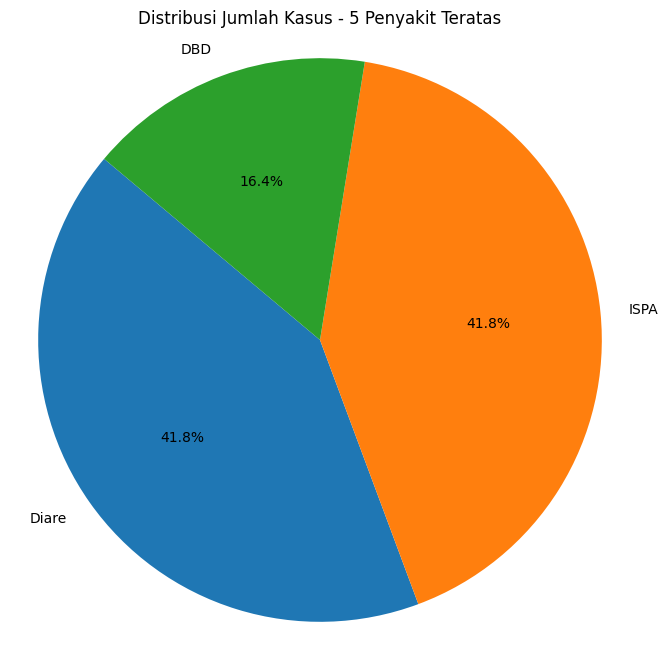

In [20]:
top5_penyakit = penyakit_summary.sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 8))
plt.pie(top5_penyakit, labels=top5_penyakit.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Jumlah Kasus - 5 Penyakit Teratas')
plt.axis('equal')  # Membuat lingkaran simetris
plt.show()


In [23]:
# Mengecek apakah kolom 'Kecamatan' ada di data
if 'Kecamatan' in df.columns:
    # Ringkasan jumlah kasus per kecamatan
    kecamatan_summary = df.groupby('Kecamatan')['Jumlah Kasus'].sum().sort_values(ascending=False)

    # Visualisasi: Jumlah Kasus per Kecamatan
    plt.figure(figsize=(14, 6))
    plt.bar(kecamatan_summary.index, kecamatan_summary.values, color='purple')
    plt.title('Jumlah Kasus per Kecamatan')
    plt.xlabel('Kecamatan')
    plt.ylabel('Jumlah Kasus')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Kecamatan' tidak ditemukan dalam dataset.")


Kolom 'Kecamatan' tidak ditemukan dalam dataset.


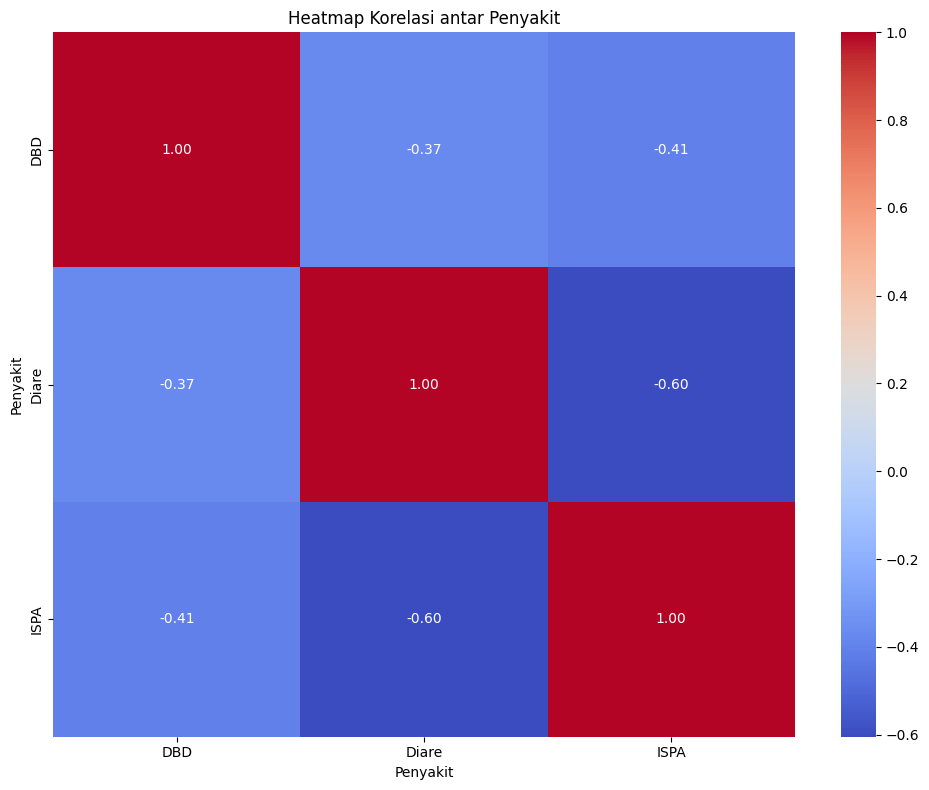

In [24]:
import seaborn as sns

# Pivot data: baris = wilayah, kolom = penyakit, isi = jumlah kasus
pivot_df = df.pivot_table(index='Provinsi', columns='Penyakit', values='Jumlah Kasus', aggfunc='sum', fill_value=0)

# Korelasi antar penyakit
corr = pivot_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Penyakit')
plt.tight_layout()
plt.show()


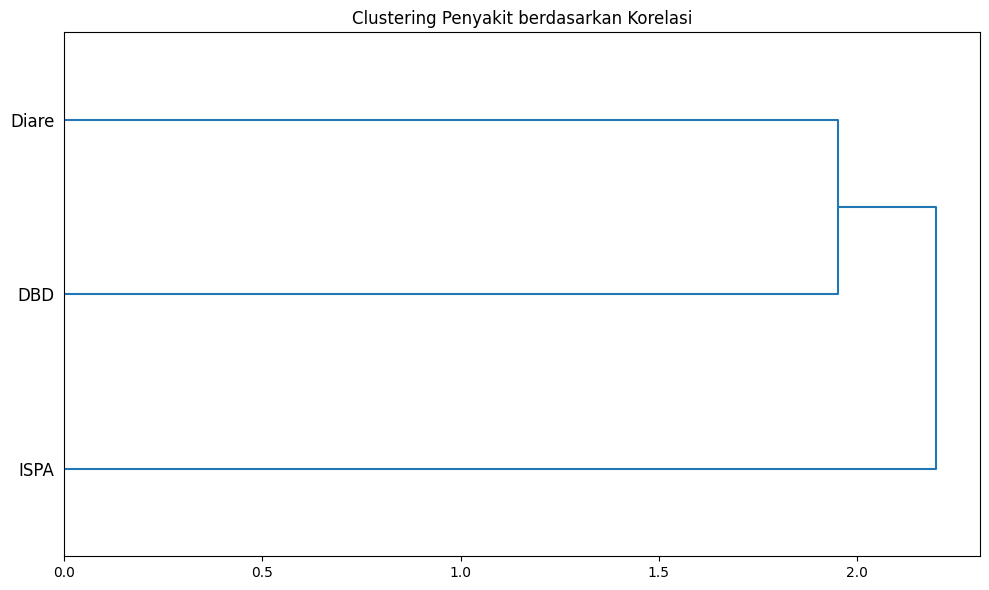

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Korelasi antar penyakit
corr = pivot_df.corr()

# Clustering
linked = linkage(corr, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=corr.columns, orientation='right')
plt.title('Clustering Penyakit berdasarkan Korelasi')
plt.tight_layout()
plt.show()


In [30]:
# Buat ulang summary jika belum dibuat
penyakit_summary = df.groupby('Penyakit')['Jumlah Kasus'].sum().sort_values(ascending=False)
provinsi_summary = df.groupby('Provinsi')['Jumlah Kasus'].sum().sort_values(ascending=False)

# Cek apakah hasilnya tidak kosong
if not penyakit_summary.empty and not provinsi_summary.empty:
    top_penyakit = penyakit_summary.idxmax()
    top_penyakit_cases = penyakit_summary.max()
    top_provinsi = provinsi_summary.idxmax()
    top_provinsi_cases = provinsi_summary.max()

    print(f"Penyakit dengan jumlah kasus terbanyak: {top_penyakit} ({top_penyakit_cases} kasus)")
    print(f"Provinsi dengan jumlah kasus terbanyak: {top_provinsi} ({top_provinsi_cases} kasus)")
else:
    print("Data penyakit atau provinsi kosong. Periksa kembali isi dataframe.")


Penyakit dengan jumlah kasus terbanyak: Diare (890 kasus)
Provinsi dengan jumlah kasus terbanyak: DKI Jakarta (600 kasus)


In [31]:
print("Kolom tersedia:", df.columns)
print("Contoh data:\n", df.head())


Kolom tersedia: Index(['Provinsi', 'Jumlah Kasus', 'Penyakit'], dtype='object')
Contoh data:
          Provinsi  Jumlah Kasus Penyakit
0      Jawa Timur           480     ISPA
1     DKI Jakarta           600    Diare
2     Jawa Tengah           350      DBD
3      Jawa Barat           410     ISPA
4  Sumatera Utara           290    Diare


In [32]:
print("Top 3 Penyakit:")
print(penyakit_summary.head(3))
print("\nTop 3 Provinsi:")
print(provinsi_summary.head(3))


Top 3 Penyakit:
Penyakit
Diare    890
ISPA     890
DBD      350
Name: Jumlah Kasus, dtype: int64

Top 3 Provinsi:
Provinsi
DKI Jakarta    600
Jawa Timur     480
Jawa Barat     410
Name: Jumlah Kasus, dtype: int64
